In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os


# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/project_description/train_00.png)
### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>

Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [64]:
## load images
import os 
from PIL import Image


import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from skimage.filters import threshold_local
from skimage.util import img_as_ubyte
from skimage.color import rgb2hsv
from skimage.color import rgb2hsv


In [91]:

def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


def preprocessing(images, block_size=5):
    processed_images = []

    for image in images:
        # Convert the image to HSV color space
        hsv_image = rgb2hsv(image)

        # Split the HSV image into hue, saturation, and value channels
        hue = hsv_image[:, :, 0]
        saturation = hsv_image[:, :, 1]
        value = hsv_image[:, :, 2]

        # Apply adaptive thresholding on the value channel
        threshold_value = threshold_local(img_as_ubyte(hue), block_size, method='mean')

        # Create the binary image using the adaptive threshold
        binary_image = value > threshold_value

        processed_images.append(binary_image)

    return processed_images




Load the image


In [232]:
import cv2
import numpy as np

import cv2
import numpy as np

def segment_image(image_list):
    processed_images = []
    
    for image in image_list:
        # Convert the image to different color spaces
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        
        # Apply different filters to segment the image
        rgb_segmentation = image_filter_rgb(image)
        hsv_segmentation = image_filter_hsv(hsv_image)
        lab_segmentation = image_filter_lab(lab_image)
        
        # Compare the segmentation results using a metric (e.g., number of white pixels)
        rgb_score = calculate_segmentation_score(rgb_segmentation)
        hsv_score = calculate_segmentation_score(hsv_segmentation)
        lab_score = calculate_segmentation_score(lab_segmentation)
        
        # Select the best segmentation result based on the score
        if rgb_score >= hsv_score and rgb_score >= lab_score:
            best_segmentation = rgb_segmentation
        elif hsv_score >= rgb_score and hsv_score >= lab_score:
            best_segmentation = hsv_segmentation
        else:
            best_segmentation = lab_segmentation
        
        processed_images.append(best_segmentation)
    
    return processed_images


def image_filter_rgb2(image):
    # Apply RGB-based filtering to segment the image
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to create a binary mask
    binary_mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=13, C=5)
    
    return binary_mask


    
def image_filter_rgb(image):
    # Apply RGB-based filtering to segment the image
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the optimal threshold using adaptive thresholding
    _, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary_mask





def image_filter_hsv(image):
    # Apply HSV-based filtering to segment the image

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split the HSV channels
    hue, saturation, value = cv2.split(hsv_image)

    # Apply adaptive thresholding on the hue channel
    _, mask = cv2.threshold(hue, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations (optional) to further refine the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask


def image_filter_hsv2(image):
    # Apply HSV-based filtering to segment the image
    
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Split the HSV channels
    hue, _, _ = cv2.split(hsv_image)
    
    # Calculate the optimal threshold using adaptive thresholding on the hue channel
    _, mask = cv2.threshold(hue, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return mask

def image_filter_lab(image):
    # Apply LAB-based filtering to segment the image
    
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Split the LAB channels
    _, _, lightness = cv2.split(lab_image)
    
    # Calculate the optimal threshold using adaptive thresholding on the lightness channel
    _, mask = cv2.threshold(lightness, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return mask


def calculate_segmentation_score2(segmentation):
    # Calculate a metric to evaluate the segmentation result
    
    # Count the number of white pixels in the segmentation mask
    num_white_pixels = np.sum(segmentation == 255)
    
    # Check if the segmentation has 9, 12, or 16 connected white regions, each with size 128x128 pixels
    num_regions = 0
    region_counts = {9: 0, 12: 0, 16: 0}
    regions = cv2.connectedComponentsWithStats(segmentation, connectivity=8)
    for label in range(1, regions[0]):
        region_stats = regions[2][label]
        region_width = region_stats[cv2.CC_STAT_WIDTH]
        region_height = region_stats[cv2.CC_STAT_HEIGHT]
        
        # Check if the region size is 128x128 pixels
        if region_width == 128 and region_height == 128:
            num_regions += 1
            
            # Count the number of regions for each perfect number
            for perfect_regions in region_counts.keys():
                if num_regions <= perfect_regions:
                    region_counts[perfect_regions] += 1
    
    # Determine the closest perfect number of regions
    closest_perfect_regions = min(region_counts, key=lambda x: abs(x - num_regions))
    
    # Compute the score based on the number of white pixels and closest perfect number of regions
    score = num_white_pixels / (closest_perfect_regions * 128 * 128)
    
    return score



def calculate_segmentation_score(segmentation):
    # Calculate a metric to evaluate the segmentation result
    
    # Check if the segmentation has 9, 12, or 16 connected white regions, each with size 128x128 pixels
    num_regions = 0
    regions = cv2.connectedComponentsWithStats(segmentation, connectivity=8)
    for label in range(1, regions[0]):
        region_stats = regions[2][label]
        region_width = region_stats[cv2.CC_STAT_WIDTH]
        region_height = region_stats[cv2.CC_STAT_HEIGHT]
        
        # Check if the region size is 128x128 pixels
        if region_width == 128 and region_height == 128:
            num_regions += 1
    
    # Determine the score based on the number of regions
    if num_regions == 9 or num_regions == 12 or num_regions == 16:
        score = 1.0
    else:
        score = 0.0
    
    return score

def detect_edges(images):
    edge_masks = []
    
    for image in images:
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        
        # Apply Laplacian of Gaussian (LoG) filter for edge detection
        edges = cv2.Laplacian(blurred, cv2.CV_8U)
        
        # Convert the edges to binary image by thresholding
        _, binary_edges = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Find contours in the binary image
        contours, _ = cv2.findContours(binary_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Filter the contours to keep only the square contours
        square_contours = []
        for contour in contours:
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
            if len(approx) == 4:
                square_contours.append(approx)
        
        # Create a blank mask image for the square contours
        mask = np.zeros_like(gray)
        
        # Draw the square contours on the mask
        cv2.drawContours(mask, square_contours, -1, 255, thickness=cv2.FILLED)
        
        edge_masks.append(mask)
    
    return edge_masks

def detect_edges2(images):
    edge_masks = []
    
    for image in images:
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (17,17), 0)
        
        # Apply Laplacian of Gaussian (LoG) filter for edge detection
        edges = cv2.Laplacian(blurred, cv2.CV_8U)
        
        # Convert the edges to binary image by thresholding
        _, binary_edges = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        edge_masks.append(binary_edges)
    
    return edge_masks



In [233]:
train_image = []
i = 0
while i < 15:
    train_image.append(load_input_image(i))
    i += 1

edges = detect_edges(train_image)
processed_image = segment_image(train_image)

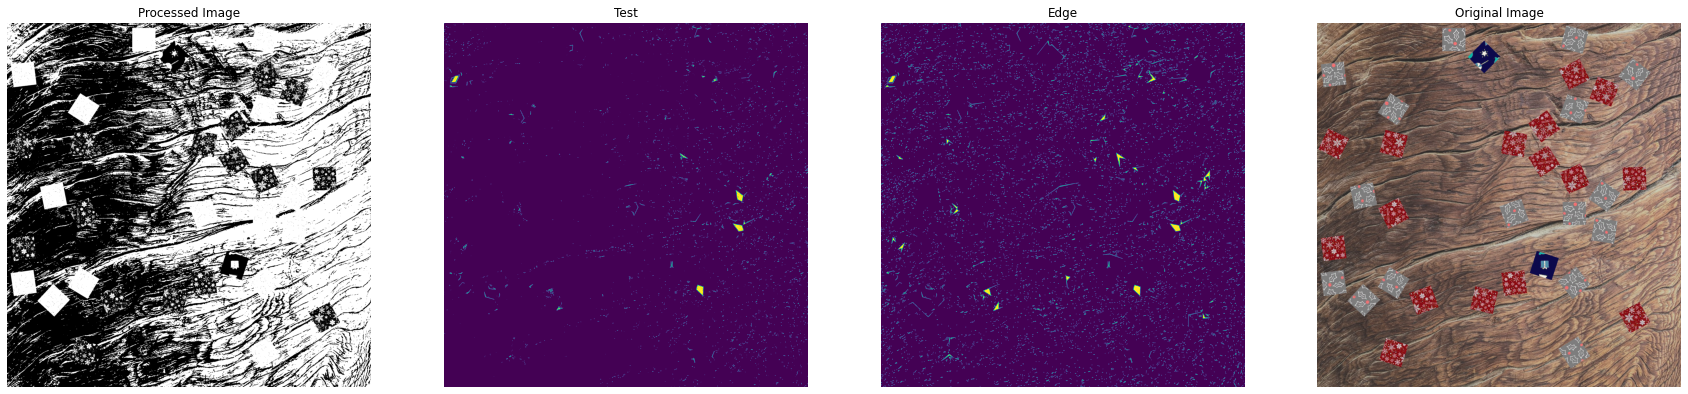

In [243]:
fig, ax = plt.subplots(1, 4, figsize=(30, 17))
i = 9


# Display the processed image
ax[0].imshow(processed_image[i], cmap='gray')
ax[0].set_title('Processed Image')
ax[0].axis('off')

ax[1].imshow(processed_image[i]*edges[i])
ax[1].set_title('Test')
ax[1].axis('off')

ax[2].imshow(edges[i])
ax[2].set_title('Edge')
ax[2].axis('off')

ax[3].imshow(train_image[i])
ax[3].set_title('Original Image')
ax[3].axis('off')
# Show the plot
plt.show()


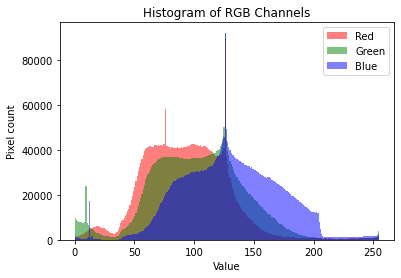

In [229]:
import matplotlib.pyplot as plt

# Split the image into RGB channels
red_channel = train_image[9][..., 2]
green_channel = train_image[9][..., 1]
blue_channel = train_image[9][..., 0]

# Flatten the channel values
red_values = red_channel.flatten()
green_values = green_channel.flatten()
blue_values = blue_channel.flatten()

# Plot the histograms
plt.figure()
plt.hist(red_values, 256, color='red', alpha=0.5, label='Red')
plt.hist(green_values, 256, color='green', alpha=0.5, label='Green')
plt.hist(blue_values, 256, color='blue', alpha=0.5, label='Blue')
plt.title("Histogram of RGB Channels")
plt.xlabel("Value")
plt.ylabel("Pixel count")
plt.legend()
plt.show()


Segment the puzzle piece from the background

In [ ]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

FileNotFoundError: [Errno 2] No such file or directory: 'data_project\\train\\train_06.png'

In [ ]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)
  


solving  6
data_project/train_solution_00
solving  10
data_project/train_solution_00


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
